1. We have data from the questionnaires survey (to ask people opinion) and objective testing with two
attributes (acid durability and strength) to classify whether a special paper tissue is good or not. Here is four
training samples as follows. Apply the K-nearest neighbour’s (KNN) algorithm when K=2, 3 and 4 to classify
an instance (3, 7) as good or bad.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Acid Durability,Strength,Classification
0,7,7,Bad
1,7,4,Bad
2,3,4,Good
3,1,4,Good
4,4,5,Bad


In [3]:
X = 3
Y = 7

In [4]:
x1s = np.array(data.iloc[:, 0:1])
x2s = np.array(data.iloc[:, 1:2])

In [5]:
distances = []
for x,y in zip(x1s,x2s):
    dist = np.sum((X-x)**2 + (Y-y)**2)
    distances.append(dist)

In [6]:
distances = np.array(distances)
distances

array([16, 25,  9, 13,  5,  4,  2, 25, 20, 26])

In [7]:
sorted_indexes = np.argsort(distances)   # argsort to sort indexes
sorted_indexes

array([6, 5, 4, 2, 3, 0, 8, 1, 7, 9])

In [8]:
k = 2
good = 0
bad = 0

for i in range(k):
    idx = sorted_indexes[i]
    classification = data['Classification'][i]
    if(classification == 'Bad'):
        bad +=1
    else:
        good+=1

print(f'Good: {good}, Bad: {bad}')        
        
if(good == bad):
    print('cannot be classified')
elif(good > bad):
    print(f'{X},{Y} : good')
else:
    print(f'{X},{Y} : bad')

Good: 0, Bad: 2
3,7 : bad


In [9]:
k = 3
good = 0
bad = 0

for i in range(k):
    idx = sorted_indexes[i]
    classification = data['Classification'][i]
    if(classification == 'Bad'):
        bad +=1
    else:
        good+=1

print(f'Good: {good}, Bad: {bad}')        
        
if(good == bad):
    print('cannot be classified')
elif(good > bad):
    print(f'{X},{Y} : good')
else:
    print(f'{X},{Y} : bad')

Good: 1, Bad: 2
3,7 : bad


In [10]:
k = 4
good = 0
bad = 0

for i in range(k):
    idx = sorted_indexes[i]
    classification = data['Classification'][i]
    if(classification == 'Bad'):
        bad +=1
    else:
        good+=1

print(f'Good: {good}, Bad: {bad}')        

if(good == bad):
    print('cannot be classified')
elif(good > bad):
    print(f'{X},{Y} : good')
else:
    print(f'{X},{Y} : bad')

Good: 2, Bad: 2
cannot be classified


2. Implement the Question number 1 with using scikit learn library. Plot the given samples Bad in Red color
and Good in green color. Also plot the decision boundary. Calculate the distance using Euclidean, Manhattan,
and Minkowski and compare.

In [30]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Read data from CSV file
data = pd.read_csv('data.csv')
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Predict a single data point
predicted_label = knn.predict([[3, 7]])
print("Predicted Label:", predicted_label)


Accuracy: 0.5
Predicted Label: ['Bad']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [52]:
df = pd.read_csv('data.csv')
df.head(2)

,x1,x2,Y
0,7,7,Bad
1,7,4,Bad


In [84]:
df_Good = df
df_Good = df_Good[df_Good['Y'] == 'Good']
df_Bad = df
df_Bad = df_Bad[df_Bad['Y'] == 'Bad']

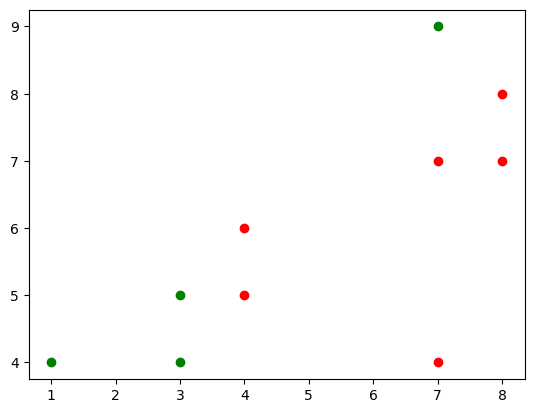

In [86]:
import matplotlib.pyplot as plt
plt.scatter(df_Good['x1'], df_Good['x2'], color='green')
plt.scatter(df_Bad['x1'], df_Bad['x2'], color='red')
plt.show()